Please wait for the kernel to be ready. It may take *a couple minutes*. When it is ready, the **circle** on the top-right corner of this browser window should be **open**.

<img src="https://raw.githubusercontent.com/mcvine/training/master/images/kernel-ready.png"/>

# Resolution function for DGS instruments

## import tools

In [2]:
import os, numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

## define and enter working dir 

** please modify the following cell **

In [3]:
workdir = '~/simulations/mcvine/resolution/demo-custom-sample'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/mcvine/resolution/demo-custom-sample


## Define the beam path by modifying the following cell. A DGS beam can be simulated using <a href="../jui/DGS-beam.ipynb">this notebook </a>

In [6]:
beam = "/SNS/users/lj7/simulations/ARCS/beam/100meV-n1e10"
instrument = 'ARCS'
Ei = 100.

## Point of interest and plotting axes

In [7]:
E = 50.
Q = 5
dQ_axis=(-2, 2, 0.02)
dE_axis=(-30, 30, 1.)

## Monte Carlo sim params

In [8]:
ncount = 1e7
nodes = 10

## Initialize simulation

In [9]:
from dgsres.powder import  use_ConstantQEKernel
sim = use_ConstantQEKernel.Sim(
    instrument = instrument,
    workdir = ".",
    beamdir = beam,
    Ei = Ei,
    Q = Q,
    dQ_axis=dQ_axis,
    dE_axis=dE_axis,
    ncount = ncount,
    nodes = nodes,
    )

## See the default sample

In [11]:
cat res-sim/sampleassembly/sampleassembly.xml

<SampleAssembly name="bcc V powder sample assembly">

  <PowderSample name="V" type="sample">
    <Shape>
      <block width="50*mm" height="50*mm" thickness="1.2*mm" />
    </Shape>
    <Phase type="crystal">
      <ChemicalFormula>V</ChemicalFormula>
      <xyzfile>V.xyz</xyzfile>
    </Phase>
  </PowderSample>

  <LocalGeometer registry-coordinate-system="InstrumentScientist">
    <Register name="V" position="(0,0,0)" orientation="(0,0,0)"/>
  </LocalGeometer>

</SampleAssembly>


## Change the sample

In [12]:
%%file res-sim/sampleassembly/sampleassembly.xml
<SampleAssembly name="bcc V powder sample assembly">

  <PowderSample name="V" type="sample">
    <Shape>
      <hollowCylinder in_radius="50*mm" out_radius="51*mm" height="100*mm" />
    </Shape>
    <Phase type="crystal">
      <ChemicalFormula>V</ChemicalFormula>
      <xyzfile>V.xyz</xyzfile>
    </Phase>
  </PowderSample>

  <LocalGeometer registry-coordinate-system="InstrumentScientist">
    <Register name="V" position="(0,0,0)" orientation="(0,0,0)"/>
  </LocalGeometer>

</SampleAssembly>

Overwriting res-sim/sampleassembly/sampleassembly.xml


## Check new sample

In [13]:
!mcvine sampleassembly check res-sim/sampleassembly/sampleassembly.xml

/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mccomponents/homogeneous_scatterer/hsxml/parser/HomogeneousScatterer.py:36: UserWarning: Transmission weight is zero. This may cause problems for hollow shapes in single-scattering-only simulations (the shadowed parts won't be simulated)
  warnings.warn("Transmission weight is zero. This may cause problems for hollow shapes in single-scattering-only simulations (the shadowed parts won't be simulated)")
DOS: fit first 100 points to parbolic
DOS: fit first 100 points to parbolic
cartesian coordinates of atom: [ 0.  0.  0.]
cartesian coordinates of atom: [ 1.51  1.51  1.51]
weight:  1.0
cartesian coordinates of atom: [ 0.  0.  0.]
cartesian coordinates of atom: [ 1.51  1.51  1.51]
weight:  1.0
/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/mccomponents/sample/phonon/multiphonon.py:233: RuntimeWarning: divide by zero encountered in divide
  return np.cosh(x)/np.sinh(x)
/SNS/software/miniconda2/envs/py2/lib/python2

## Run sim

In [14]:
%%time
sim.run(E=E)

CPU times: user 100 ms, sys: 19.9 ms, total: 120 ms
Wall time: 16min 18s


/SNS/software/miniconda2/envs/py2/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


Results

In [15]:
ls out

ie-E_5-Q_50.0.h5  iqe-E_5-Q_50.0.h5


In [16]:
import histogram.hdf as hh, histogram as H
%matplotlib notebook

<IPython.core.display.Javascript object>


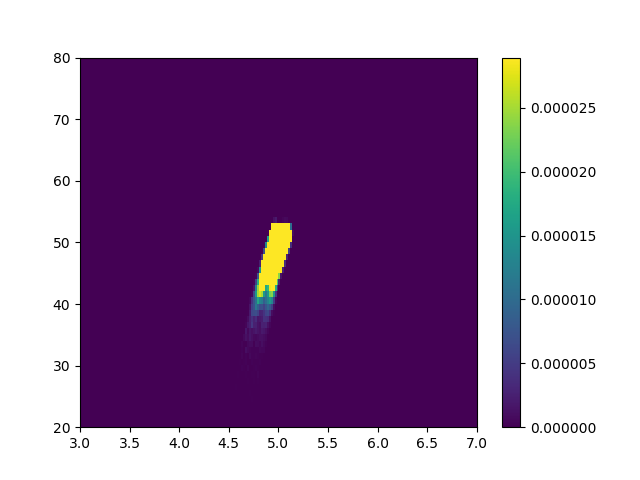

plot z in (0.0, 2.89314023371e-05)


In [17]:
plt.figure()
H.plot(hh.load("./out/iqe-E_5-Q_50.0.h5"))
plt.close()

<IPython.core.display.Javascript object>


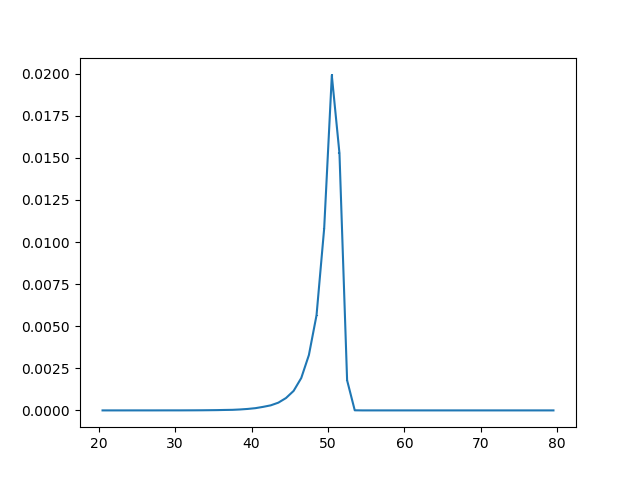

In [19]:
plt.figure()
H.plot(hh.load("./out/ie-E_5-Q_50.0.h5"))
plt.close()